In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

from tensorflow.keras import layers, models, optimizers, utils,datasets
from utils import display

2023-07-09 23:10:55.347273: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 23:10:55.416361: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-09 23:10:55.436953: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-09 23:10:55.772198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

1 Physical GPUs, 1 Logical GPUs


2023-07-09 23:10:56.311474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-09 23:10:56.329874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-09 23:10:56.329974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-09 23:10:56.330555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [2]:
NUM_CLASSES = 10 

### Load the datasets

In [3]:
(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()

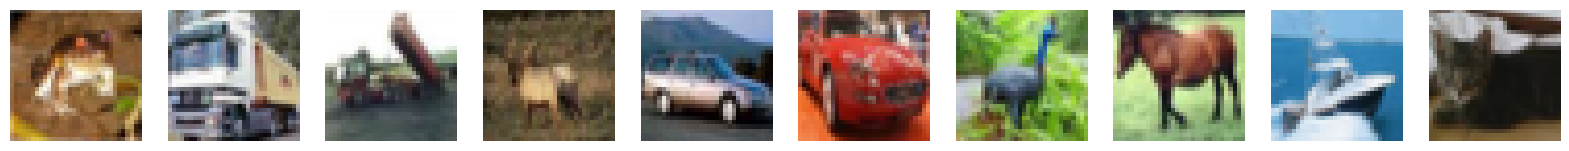

In [4]:
display(x_train[:10])

## Prepare the datasets

In [5]:
x_train = x_train.astype("float32") / 255.0 
x_test = x_test.astype("float32") / 255.0 

y_train = utils.to_categorical(y_train,NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

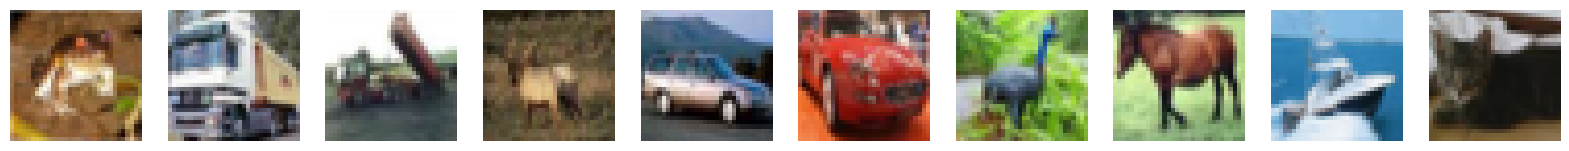

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
display(x_train[:10]) 
print(y_train[:10])

In [7]:
x_train.shape

(50000, 32, 32, 3)

### Build the model

To build the model, we have used three different kinds of layers.   
**Input layer**: This is the entry point of the network where we specify the shape of each data elements to expect as tuple. Here, we donot specify the batch size.  
**Flatten layer** : It converts our input into vector because the subsequent Dense layer requires its input to be flat   
**Dense layer** : It contains a specified number of unit that are densely connected to the previous layer through a single connection that carries weight. The output from the unit which is the weighted sum of inputs from the previous units is passed through a non linear activation functions. 

### Activation Function 
An activation function ensures that the neural network is capable of learning complex function instead of a linear combination of its input. Some of the common activation function are: 

**ReLU(rectified linear unit)** : defined to be 0 if the input is negative and is equal otherwise. It can sometime die if they always output as a result no error are propagated.
$$Relu(z) = max(0, z)$$  

**Leaky ReLU** : Similar to the ReLU but returns a small negative number proportional to the input.Fixes the error propagation by ensuring that gradient is 0.$$\begin{equation} f(x) = \begin{cases} 0.01x, & \text{if}\ x < 0 \\ x, & \text{otherwise} \\ \end{cases} \end{equation}$$  
**Sigmoid** : Useful if the desired output from the layer is scaled between 0 and 1. Used in binary classification problem with one output unit or multilabel classification problems where each observation can belong tpo more than one class. 
$$\sigma(z) = \frac{1} {1 + e^{-z}}$$  
**Softmax** : Useful if you want total sum of the output from the layer to equal 1. Used for multiclass classification problems where each observation only belongs to exactly one class. $$\sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K$$

In [8]:
input_layer = layers.Input((32,32,3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200,activation="relu")(x)
x = layers.Dense(150,activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES,activation="softmax")(x)
model = models.Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## Compiling the model 

### Loss Functions
Neural network uses loss function to compare the predicted output and the ground truth which is single number for each observation.  

For solving a regression problem, we usually use mean squared loss function which is defined as: $$MSE = \sum_{i=1}^{D}(x_i-y_i)^2$$. We can also use mean absolute error defined as $$MAE = \sum_{i=1}^{D}|x_i-y_i|$$

For solving classification problem where each observation can belong to only one class, then use categorical cross-entropy where we calculate a separate loss for each class label per observation and sum the result It is defined as: 
$$Cross entropy = -\sum_{c=1}^My_{o,c}\log(p_{o,c})$$

For working with binary classfication problem with one output unit or multilable problem, we will be using binary cross-entropy loss function $$Binary Cross entropy = -{(y\log(p) + (1 - y)\log(1 - p))}$$
### Optimizers

They are the algorithm that is used to update the weights in the neural network with respect to the gradient of the loss function. They usually contain some hyperparameters that we usually tweak to get better result. Common optimzers are Gradient descent, Adaptive Moment Estimation (Adam), Root Mean Squared Propagation (RMSProp)etc. For Adam, we usually tweak only the learning rate which is the scale factor for change in the weights at each training step.

In [9]:

opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

### Training the model 

Here, the batch_size refers to how many data instances we pass during one training step and epochs refers to the total number of times the network will be shown the training data. 

In [10]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
  51/1563 [..............................] - ETA: 1s - loss: 2.2427 - accuracy: 0.1838   

2023-07-09 23:10:58.639526: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1563/1563 [==============================] - 2s 955us/step - loss: 1.8440 - accuracy: 0.3346
Epoch 2/10
1563/1563 [==============================] - 1s 919us/step - loss: 1.6585 - accuracy: 0.4083
Epoch 3/10
1563/1563 [==============================] - 1s 924us/step - loss: 1.5791 - accuracy: 0.4369
Epoch 4/10
1563/1563 [==============================] - 1s 932us/step - loss: 1.5282 - accuracy: 0.4553
Epoch 5/10
1563/1563 [==============================] - 1s 935us/step - loss: 1.4889 - accuracy: 0.4683
Epoch 6/10
1563/1563 [==============================] - 1s 952us/step - loss: 1.4573 - accuracy: 0.4807
Epoch 7/10
1563/1563 [==============================] - 1s 927us/step - loss: 1.4342 - accuracy: 0.4889
Epoch 8/10
1563/1563 [==============================] - 1s 915us/step - loss: 1.4068 - accuracy: 0.4987
Epoch 9/10
1563/1563 [==============================] - 1s 917us/step - loss: 1.3878 - accuracy: 0.5034
Epoch 10/10
1563/1563 [==============================] - 1s 937us/step - lo

### Model Evaluation

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 818us/step - loss: 1.4423 - accuracy: 0.4925


[1.4423452615737915, 0.4925000071525574]

In [12]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 0s 534us/step


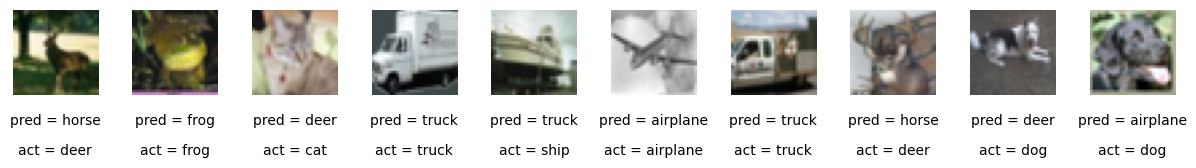

In [13]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)